# Challenge

In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd

In [10]:
import datetime as dt

In [44]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [37]:
engine = create_engine("sqlite:///Data/hawaii.sqlite")
Base = automap_base()

In [38]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [39]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [40]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
# Displaying "measurement" table columns
columns = [m.key for m in Measurement.__table__.columns]
columns

['id', 'station', 'date', 'prcp', 'tobs']

In [51]:
# Displaying "station" table columns
columns = [m.key for m in Station.__table__.columns]
columns

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

## Climate Analysis for June 2017

In [86]:
# Design a query to retrieve the precipitation and tobs data for the month of June 2017.
 
# Starting from June, 1st 2017. 
start_june = dt.date(2017, 6, 1)

# Ending on June, 30th 2017
end_june = dt.date(2017, 6, 30)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs ).\
    filter(Measurement.date >= start_june).\
    filter(Measurement.date <= end_june).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(results, columns=['date','precipitation','tobs'])
june_df.set_index(june_df['date'], inplace=True)
june_df.index.names = ['Date']

# Sort the dataframe by date
june_df = june_df.sort_index()

june_df.head()

,date,precipitation,tobs
Date,,,
2017-06-01,2017-06-01,0.00,79.0
2017-06-01,2017-06-01,0.00,79.0
2017-06-01,2017-06-01,0.00,81.0
2017-06-01,2017-06-01,0.01,74.0
2017-06-01,2017-06-01,0.03,76.0


### Key statistical data about the month of June 2017

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
june_df.describe()

,precipitation,tobs
count,171.000000,191.000000
mean,0.120000,77.219895
std,0.217726,2.622538
min,0.000000,71.000000
25%,0.000000,75.000000
50%,0.020000,77.000000
75%,0.150000,79.000000
max,1.690000,83.000000


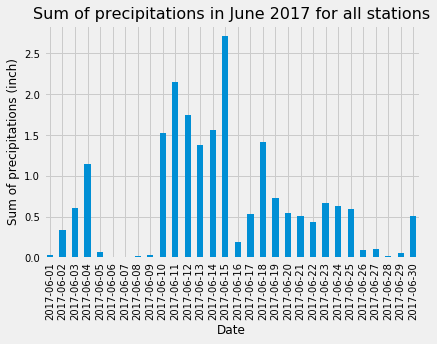

In [142]:
# Use Pandas Plotting with Matplotlib to plot the data (precipitations)
june_prec_df = june_df[["date","precipitation"]].groupby("date").sum()
june_prec_df.plot(kind="bar",legend=None)
plt.title("Sum of precipitations in June 2017 for all stations",fontsize=16)
plt.ylabel("Sum of precipitations (inch)",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.savefig("Images/June_prec.png", bbox_inches='tight')

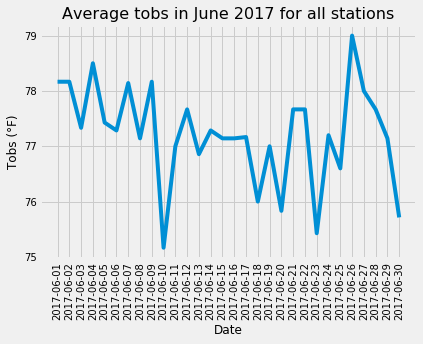

In [144]:
# Use Pandas Plotting with Matplotlib to plot the data (tobs)
june_tobs_df = june_df[["date","tobs"]].groupby("date").mean()
june_tobs_df.plot(legend=None)
plt.title("Average tobs in June 2017 for all stations",fontsize=16)
plt.ylabel("Tobs (°F)",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.xticks(np.arange(len(june_df["date"].unique().tolist())),june_df["date"].unique().tolist())
plt.yticks(fontsize=10)
plt.savefig("Images/June_tobs.png", bbox_inches='tight')